In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

no_gtx_df = pd.read_csv("kernel_invocations_no_gtx.csv")
no_gtx_df["scenario"] = "no_gtx"
gtx_df = pd.read_csv("kernel_invocations_gtx.csv")
gtx_df["scenario"] = "gtx"

df = pd.concat([no_gtx_df, gtx_df])

# remove the kernel containing name "distribution"
df = df[~df["kernel_name"].str.contains("distribution")]

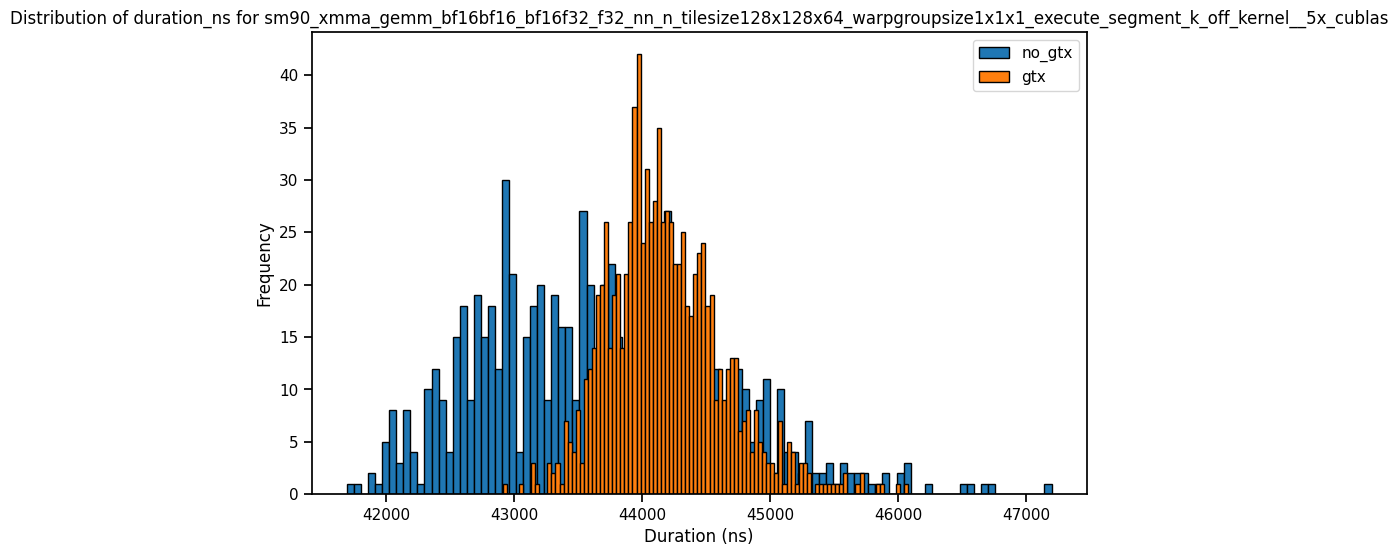

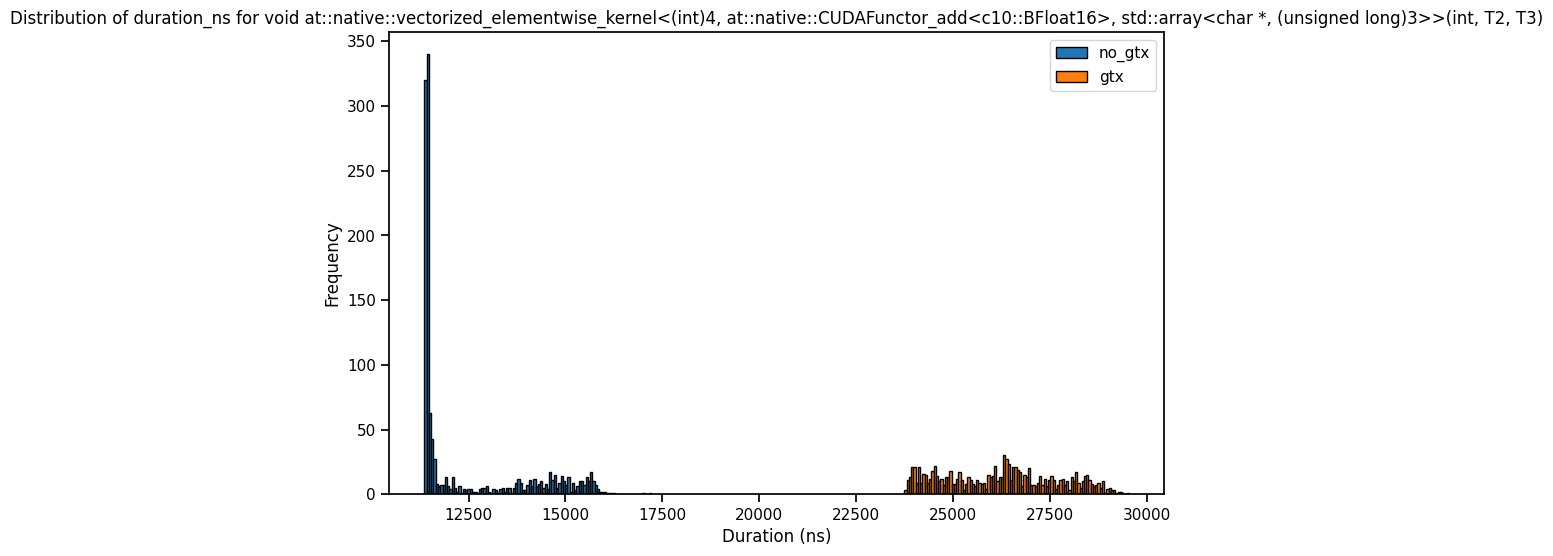

In [22]:
# plot the distribution of duration_ns for each kernel

for kernel in df["kernel_name"].unique():
    plt.figure(figsize=(10, 6))

    for scenario in df["scenario"].unique():
        plt.hist(df[(df["kernel_name"] == kernel)
                    & (df["scenario"] == scenario)]["duration_ns"],
                 bins=100,
                 edgecolor="black",
                 label=scenario)
    plt.title(f"Distribution of duration_ns for {kernel}")
    plt.xlabel("Duration (ns)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()